In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
import compute_S_rate
import auxiliary_functions
import seaborn
import math

import networkx as nx

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
def Discrete_RW_T(A):    # Calculate the degree vector (sum of non-zero elements in each row)
    degree_vector = np.array(A.sum(axis=1)).ravel()

    # Avoid division by zero by setting degree to 1 for nodes with no edges
    no_out_edges = degree_vector == 0
    degree_vector[no_out_edges] = 1.0

    # Create a diagonal matrix from the inverted degree vector
    degree_matrix = np.diag(1.0 / degree_vector)

    # Calculate the random walk Transition matrix: T = D^(-1) * A
    T = degree_matrix @ A
    np.fill_diagonal(T, no_out_edges, wrap=False)
    return T

In [3]:
time = [i for i in np.linspace(1,100,2)]
N = 20
n_samples = 1
list_p = [0.01, 0.05, 0.10, 0.25, 0.5, 0.75]

list_avg_Tentry = []

for i, p in enumerate(list_p):
    list_avg_Tsample = []
    for sample in range(n_samples):
        er_adj = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
        T = Discrete_RW_T(er_adj)
        print(T)
        list_avg_Tsample.append(np.mean(T))
    list_avg_Tentry.append(list_avg_Tsample)    

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

In [4]:
list_avg_Tentry

[[0.05], [0.05], [0.05], [0.05], [0.05], [0.05]]

In [5]:
approx_1 = []
approx_2 = []
for p in list_p:
    approx_1.append((1-pow((1-p), N)) / N)
    approx_2.append((pow(p, N)) / N + (1-pow(p, N)) * (1-pow((1-p), N)) / N)

In [6]:
list_avg_Tentry

[[0.05], [0.05], [0.05], [0.05], [0.05], [0.05]]

## Powers of T

In [7]:
N= 1000
p = 0.005
er_adj = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
T = Discrete_RW_T(er_adj)
times = [1, 2, 3, 5, 8, 10, 15, 20, 25, 35]

list_power_T = []
for t in times:
    power_T = np.linalg.matrix_power(T, t)
    list_power_T.append(power_T)

(array([ 36., 104., 346., 166., 207.,  81.,  36.,  20.,   2.,   2.]),
 array([0.        , 0.00029035, 0.00058069, 0.00087104, 0.00116139,
        0.00145173, 0.00174208, 0.00203243, 0.00232277, 0.00261312,
        0.00290347]),
 <BarContainer object of 10 artists>)

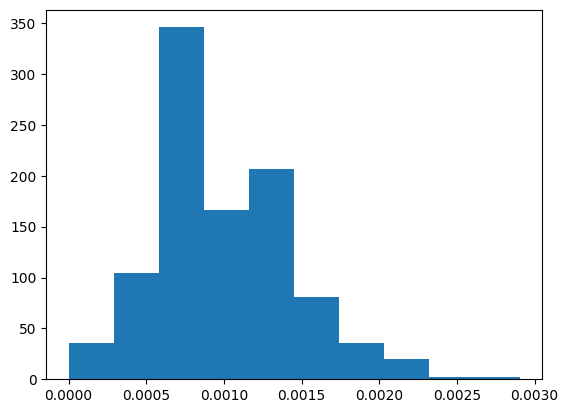

In [8]:
plt.hist(list_power_T[-1][0])

In [9]:
N= 1000
p = 0.005
er_adj = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
T = Discrete_RW_T(er_adj)
times = [1, 2, 3, 5, 8, 10, 15, 20, 25, 35]

list_no_nonzero_entries = []
list_avg_row_entropies = []
for t in times:
    power_T = np.linalg.matrix_power(T, t)
    no_nonzero_entries = np.mean(np.sum(power_T > 0, axis=1))
    list_no_nonzero_entries.append(no_nonzero_entries)
    
    logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
    powTlogpowTdata = power_T * logpowTdata
    rows_entropies = -np.sum(powTlogpowTdata, axis=0)
    avg_row_entropy = np.mean(rows_entropies / np.log(np.sum(power_T > 0, axis=0)))
    list_avg_row_entropies.append(avg_row_entropy)


/tmp/ipykernel_901978/690598351.py:17: RuntimeWarning: divide by zero encountered in divide
  avg_row_entropy = np.mean(rows_entropies / np.log(np.sum(power_T > 0, axis=0)))
/tmp/ipykernel_901978/690598351.py:17: RuntimeWarning: invalid value encountered in divide
  avg_row_entropy = np.mean(rows_entropies / np.log(np.sum(power_T > 0, axis=0)))


In [10]:
list_no_nonzero_entries

[4.861,
 23.974,
 107.365,
 801.448,
 981.682,
 982.09,
 982.09,
 982.09,
 982.09,
 982.09]

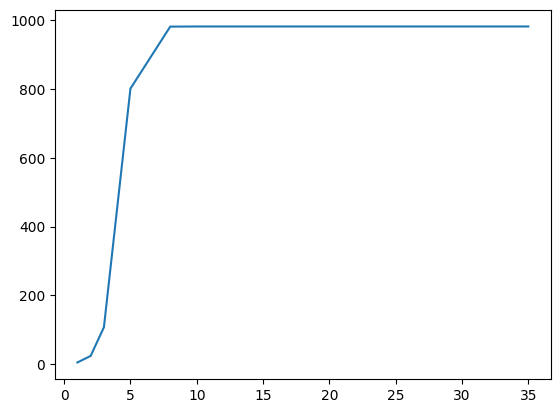

In [11]:
plt.plot(times, list_no_nonzero_entries)

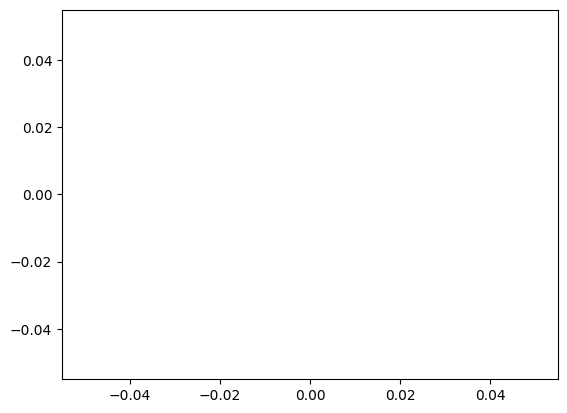

In [12]:
plt.plot(times, list_avg_row_entropies)

In [13]:
list_avg_row_entropies

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [14]:
power_T

array([[0.00123846, 0.00185518, 0.00061811, ..., 0.00123633, 0.00020608,
        0.00082553],
       [0.00123679, 0.00185545, 0.00061814, ..., 0.00123704, 0.00020587,
        0.00082273],
       [0.00123621, 0.00185441, 0.00061833, ..., 0.0012376 , 0.00020628,
        0.0008236 ],
       ...,
       [0.00123633, 0.00185556, 0.0006188 , ..., 0.00123656, 0.00020608,
        0.00082439],
       [0.00123648, 0.00185287, 0.00061885, ..., 0.00123645, 0.00020641,
        0.0008267 ],
       [0.0012383 , 0.00185114, 0.0006177 , ..., 0.00123659, 0.00020667,
        0.0008245 ]])

In [15]:
T.shape

(1000, 1000)

## Spread of entropy of first row in ER graphs

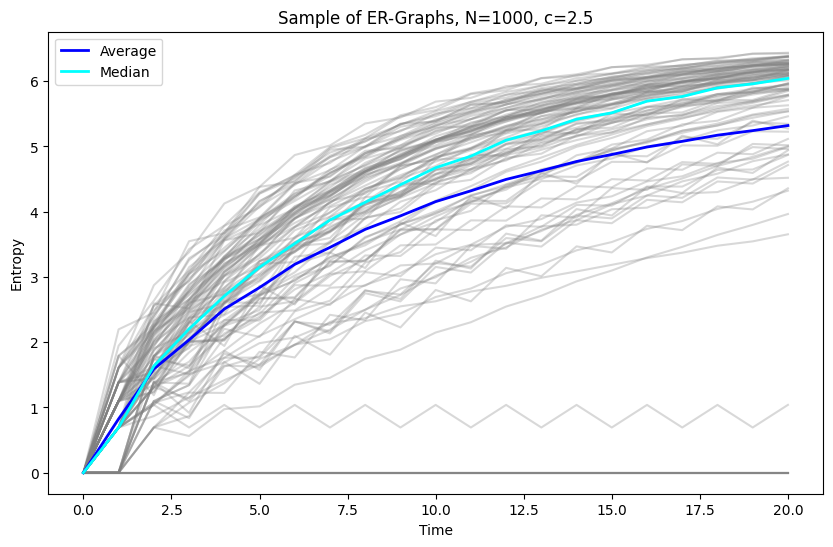

In [85]:
# Parameters
N = 1000
c = 2.5
p = c / N
sample_size = 100 # number of graphs in the sample

max_tau = 20

# Generate sample of graphs and compute list_H_er for each
lists_H_er = []

for _ in range(sample_size):
    adj_matrix = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_er = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_er.append(row_entropy)
    lists_H_er.append(H_er)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_er = np.array(lists_H_er)

# Compute the average across all trees (average of each position)
average_H_er = np.mean(lists_H_er, axis=0)
# Compute the median across all trees (average of each position)
median_H_er = np.median(lists_H_er, axis=0)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each list in gray with transparency
for list_H in lists_H_er:
    plt.plot(list_H, color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_er, color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_er, color='cyan', linewidth=2, label="Median")


# Plot list_H_regtree in red on top (assuming this is provided)
#plt.plot(list_H_regtree, color='black', linewidth=2, label="Additional list_H_er")

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.legend()
plt.title("Sample of ER-Graphs, N=1000, c=2.5")

# Show the plot
plt.savefig('/home/b/skoove/Desktop/plots_entropy/spread_ERgraphs.png', format='png', dpi=300)
plt.show()

### Comparison with branching process

In [71]:
def stochastic_branching_tree_adjacency_matrix(distr, d):
    # Start with a list to track nodes at each level
    levels = [[0]]  # Root node is at level 0
    
    # Adjacency list to build the tree dynamically
    adjacency_list = []
    node_index = 1  # Index of the next node to be added

    # Generate the tree level by level up to depth d
    for level in range(d):
        current_level = levels[level]
        next_level = []
        
        # For each node in the current level, sample the number of children
        for parent in current_level:
            num_children = distr()
            children = []

            for _ in range(num_children):
                children.append(node_index)
                adjacency_list.append((parent, node_index))  # Add edge to adjacency list
                node_index += 1

            next_level.extend(children)  # Add children to the next level

        if next_level:
            levels.append(next_level)
        else:
            break  # Stop if no new children were added

    # Convert adjacency list to adjacency matrix
    total_nodes = node_index
    adjacency_matrix = np.zeros((total_nodes, total_nodes), dtype=int)
    
    for parent, child in adjacency_list:
        adjacency_matrix[parent, child] = 1
        adjacency_matrix[child, parent] = 1  # Symmetric for undirected tree

    return adjacency_matrix

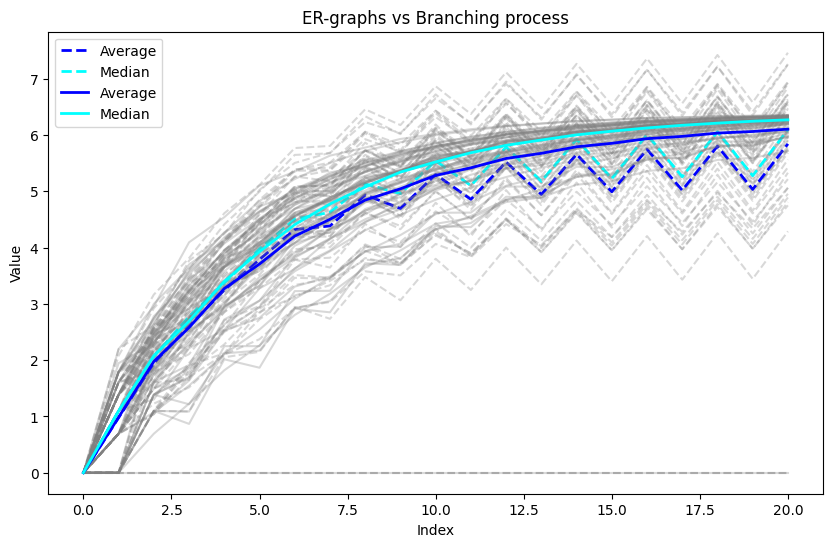

In [76]:
# Parameters ER graphs
N = 729
c = 3
p = c / N


# Parameters Branching process
c = 3  # branching factor (example)
d = 6  # depth of the tree


sample_size = 50 # number of graphs in the sample


# Distribution function for number of children (example with Poisson)
distr = lambda: np.random.poisson(3)

# Generate sample of graphs and compute list_H_stochtree for each
lists_H_stochtree = []

for _ in range(sample_size):
    adj_matrix = stochastic_branching_tree_adjacency_matrix(distr, d)
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_stochtree = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_stochtree.append(row_entropy)
    lists_H_stochtree.append(H_stochtree)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_stochtree = np.array(lists_H_stochtree)

# Compute the average across all trees (average of each position)
average_H_stochtree = np.mean(lists_H_stochtree, axis=0)
# Compute the median across all trees (average of each position)
median_H_stochtree = np.median(lists_H_stochtree, axis=0)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each list in gray with transparency
for list_H in lists_H_stochtree:
    plt.plot(list_H, '--', color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_stochtree, '--', color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_stochtree, '--', color='cyan', linewidth=2, label="Median")


lists_H_er = []
for _ in range(sample_size):
    adj_matrix = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_er = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_er.append(row_entropy)
    lists_H_er.append(H_er)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_er = np.array(lists_H_er)

# Compute the average across all trees (average of each position)
average_H_er = np.mean(lists_H_er, axis=0)
# Compute the median across all trees (average of each position)
median_H_er = np.median(lists_H_er, axis=0)


# Plot each list in gray with transparency
for list_H in lists_H_er:
    plt.plot(list_H, color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_er, color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_er, color='cyan', linewidth=2, label="Median")



# Add labels and legend
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("ER-graphs vs Branching process")

# Show the plot
plt.show()

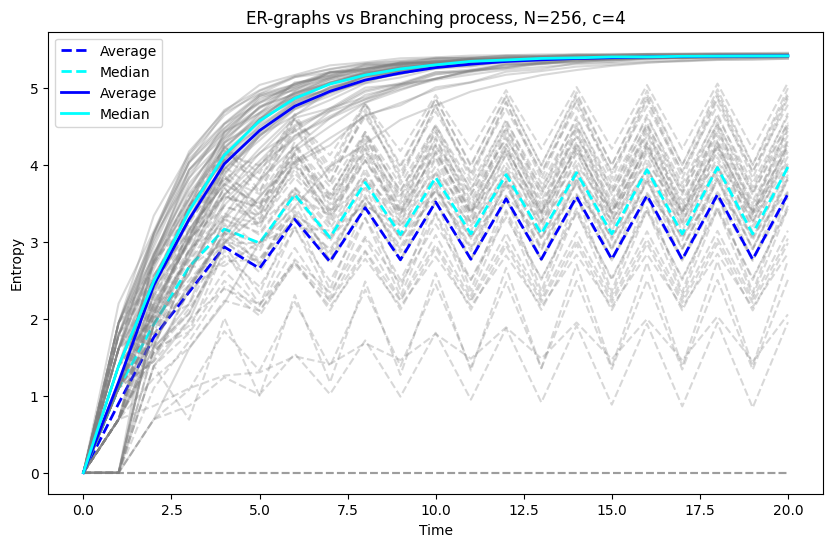

In [86]:
# Parameters ER graphs
N = 257
c = 4
p = c / N


# Parameters Branching process
c = 4  # branching factor (example)
d = 4  # depth of the tree

max_tau = 20
sample_size = 50 # number of graphs in the sample


# Distribution function for number of children (example with Poisson)
distr = lambda: np.random.poisson(3)

# Generate sample of graphs and compute list_H_stochtree for each
lists_H_stochtree = []

for _ in range(sample_size):
    adj_matrix = stochastic_branching_tree_adjacency_matrix(distr, d)
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_stochtree = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_stochtree.append(row_entropy)
    lists_H_stochtree.append(H_stochtree)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_stochtree = np.array(lists_H_stochtree)

# Compute the average across all trees (average of each position)
average_H_stochtree = np.mean(lists_H_stochtree, axis=0)
# Compute the median across all trees (average of each position)
median_H_stochtree = np.median(lists_H_stochtree, axis=0)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each list in gray with transparency
for list_H in lists_H_stochtree:
    plt.plot(list_H, '--', color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_stochtree, '--', color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_stochtree, '--', color='cyan', linewidth=2, label="Median")


lists_H_er = []
for _ in range(sample_size):
    adj_matrix = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_er = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_er.append(row_entropy)
    lists_H_er.append(H_er)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_er = np.array(lists_H_er)

# Compute the average across all trees (average of each position)
average_H_er = np.mean(lists_H_er, axis=0)
# Compute the median across all trees (average of each position)
median_H_er = np.median(lists_H_er, axis=0)


# Plot each list in gray with transparency
for list_H in lists_H_er:
    plt.plot(list_H, color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_er, color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_er, color='cyan', linewidth=2, label="Median")



# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.legend()
plt.title("ER-graphs vs Branching process, N=256, c=4")
plt.savefig('/home/b/skoove/Desktop/plots_entropy/DTRW_ER_vs_GW.png', format='png', dpi=300)
# Show the plot
plt.show()

### Comparison with continuous-time diffusion

In [80]:
# Parameters ER graphs
N = 256
c = 4
p = c / N


# Parameters Branching process
c = 4  # branching factor (example)
d = 4  # depth of the tree

max_tau = 20
sample_size = 50 # number of graphs in the sample


# Distribution function for number of children (example with Poisson)
distr = lambda: np.random.poisson(c)

# Generate sample of graphs and compute list_H_stochtree for each
lists_H_stochtree = []
p0 = np.zeros(N)
p0[0] = 1

for _ in range(sample_size):
    adj_matrix = stochastic_branching_tree_adjacency_matrix(distr, d)

    stochtree = StaticTempNetwork(times = times, adjacency = csr_matrix(adj_matrix))
    stochtree.compute_laplacian_matrices(random_walk = True)

    stochtree.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    stochtree.compute_transition_matrices(lamda=1)

    H_stochtree = compute_S_rate.compute_conditional_entropy(net=stochtree, list_T=stochtree.T[1], lamda=1, force_csr=True, time_domain= list(range(len(times)-1)), p0 = p0)
    lists_H_stochtree.appen(H_stochtree)


# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_stochtree = np.array(lists_H_stochtree)

# Compute the average across all trees (average of each position)
average_H_stochtree = np.mean(lists_H_stochtree, axis=0)
# Compute the median across all trees (average of each position)
median_H_stochtree = np.median(lists_H_stochtree, axis=0)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each list in gray with transparency
for list_H in lists_H_stochtree:
    plt.plot(list_H, '--', color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_stochtree, '--', color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_stochtree, '--', color='cyan', linewidth=2, label="Median")


lists_H_er = []
for _ in range(sample_size):
    adj_matrix = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
    
    T = Discrete_RW_T(adj_matrix)
    times = range(max_tau + 1)
    list_power_T = []
    for t in times:
        power_T = np.linalg.matrix_power(T, t)
        list_power_T.append(power_T[0,:])

    H_er = []
    for power_T in list_power_T:
        logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
        powTlogpowTdata = power_T * logpowTdata
        row_entropy = -np.sum(powTlogpowTdata)
        H_er.append(row_entropy)
    lists_H_er.append(H_er)

# Convert list of lists to a 2D numpy array for easier computation of the average
lists_H_er = np.array(lists_H_er)

# Compute the average across all trees (average of each position)
average_H_er = np.mean(lists_H_er, axis=0)
# Compute the median across all trees (average of each position)
median_H_er = np.median(lists_H_er, axis=0)


# Plot each list in gray with transparency
for list_H in lists_H_er:
    plt.plot(list_H, color='gray', alpha=0.3)

# Plot the average of all lists in a distinct color (e.g., blue)
plt.plot(average_H_er, color='blue', linewidth=2, label="Average")
# Plot the median of all lists in a distinct color (e.g., blue)
plt.plot(median_H_er, color='cyan', linewidth=2, label="Median")



# Add labels and legend
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("ER-graphs vs Branching process")

# Show the plot
plt.show()

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


ValueError: dimension mismatch

In [ ]:
er_rw = StaticTempNetwork(times = times, adjacency = csr_matrix(er_adj))
er_rw.compute_laplacian_matrices(random_walk = True)

er_rw.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
er_rw.compute_transition_matrices(lamda=1)

H_er_rw = compute_S_rate.compute_conditional_entropy(net=er_rw, list_T=er_rw.T[1], lamda=1, force_csr=True, time_domain= list(range(len(times)-1)), p0 = pi_0)

### Approximation with shells

In [16]:
np.log(np.where(power_T > 0, power_T, 1))

array([[-6.69388347, -6.28977263, -7.38884947, ..., -6.69560851,
        -8.48724534, -7.09948338],
       [-6.69523774, -6.28962666, -7.38879877, ..., -6.69503436,
        -8.48824332, -7.10288646],
       [-6.69570229, -6.29018648, -7.38849512, ..., -6.69458045,
        -8.48626065, -7.10182085],
       ...,
       [-6.69560851, -6.28956925, -7.38772764, ..., -6.69542004,
        -8.48726998, -7.10086301],
       [-6.69548587, -6.29101874, -7.38764836, ..., -6.69551051,
        -8.48565713, -7.09806941],
       [-6.69401827, -6.29195625, -7.38950292, ..., -6.69539791,
        -8.48436378, -7.1007335 ]])

In [17]:
N= 1000
p = 0.005
er_adj = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
T = Discrete_RW_T(er_adj)
times = [1, 2, 3, 5, 8, 10, 15, 20, 25, 35]

In [18]:
n_edges = er_adj.toarray().sum() / 2
degrees = er_adj.toarray().sum(0)
pi_0 = degrees / (2*n_edges)

list_H_er = [0]
for t in times:
    power_T = np.linalg.matrix_power(T, t)
    logpowTdata = np.log(np.where(power_T > 0, power_T, 1))
    powTlogpowTdata = power_T * logpowTdata
    rows_entropies = -np.sum(powTlogpowTdata, axis=1)
    H_er = np.dot(pi_0, rows_entropies)
    print(H_er)
    list_H_er.append(H_er)

1.7138616302494842
3.0908581947495875
4.265878628272533
5.816014622361485
6.560253532502983
6.706607286580066
6.791301223544612
6.799813926172594
6.801059600109788
6.80158056709366


In [19]:
avg_degree = np.mean(degrees)
corrected_degrees  = np.where(degrees > 0, degrees, 1)
avg_degreelogdegree = np.mean(degrees * np.log(corrected_degrees))
asymptot = np.log(2 * n_edges) - avg_degreelogdegree / avg_degree

In [20]:
sum_shells = 1
list_model_entropies = [0]
shell = 1
while True:
    if shell <= times[-1]:
        if sum_shells + pow((N - sum_shells) * p, shell + 1) < N:
            sum_shells += pow((N - sum_shells) * p, shell + 1)
            shell += 1

            H = min(asymptot, np.log(sum_shells))
            list_model_entropies.append(H)
        else:
            sum_shells = N
            list_model_entropies.append(asymptot)
    else:
        break

# if len(list_model_entropies) < len(times):
#     for i in range(len(list_model_entropies), len(times)+1):
#         list_model_entropies.append(asymptot)            

In [28]:
# Alex's logistic grwoth
sum_shells = 1
list_model_entropies2 = [0]
shell = 1
while True:
    if shell <= times[-1]:
        if (1+(p*N-1)*(1-sum_shells/N))*sum_shells < N -1:
            sum_shells = (1+(p*N-1)*(1-sum_shells/N))*sum_shells
            shell += 1
            H = min(asymptot, np.log(sum_shells))
            list_model_entropies2.append(H)
        else:
            sum_shells = N -1
            list_model_entropies2.append(asymptot)
            break
    else:
        break

In [33]:
times

[1, 2, 3, 5, 8, 10, 15, 20, 25, 35]

In [32]:
list_model_entropies2

[0,
 1.0986789531126528,
 2.1970911150660757,
 3.2947027433686347,
 4.389912290817286,
 5.477914189030148,
 6.544289956710341,
 6.801730279799779,
 6.801730279799779,
 6.801730279799779]

In [29]:
er_rw = StaticTempNetwork(times = times, adjacency = csr_matrix(er_adj))
er_rw.compute_laplacian_matrices(random_walk = True)

er_rw.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
er_rw.compute_transition_matrices(lamda=1)

/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


In [30]:
H_er_rw = compute_S_rate.compute_conditional_entropy(net=er_rw, list_T=er_rw.T[1], lamda=1, force_csr=True, time_domain= list(range(len(times)-1)), p0 = pi_0)

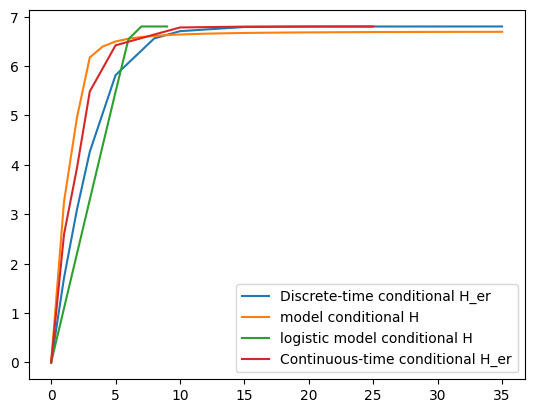

In [36]:
plt.plot([0] + times, list_H_er, label = 'Discrete-time conditional H_er')
plt.plot(range(len(list_model_entropies)), list_model_entropies, label = 'model conditional H')
plt.plot(range(len(list_model_entropies2)), list_model_entropies2, label = 'logistic model conditional H')
plt.plot([0] + times[:-1], H_er_rw[list(H_er_rw.keys())[0]], label = 'Continuous-time conditional H_er')
plt.legend()
plt.savefig('/home/b/skoove/Desktop/plots_entropy/conditional_entropyER.png', format='png', dpi=300)
plt.show()